<img src="im_note/AC-logo.png" alt="Drawing" style="width: 200px;"/> <img src="im_note/logo.png" alt="Drawing" style="width: 150px;"/> 
<img src="im_note/logo3.png" alt="Drawing" style="width: 350px;"/><img src="im_note/GCRF.png" alt="Drawing" style="width: 150px;"/>

# Using gaussian processes to forecast VCI

#### -GPs for time series: http://www.robots.ox.ac.uk/~sjrob/Pubs/philTransA_2012.pdf
#### -We use Pyro for our GP fit: http://pyro.ai/examples/gp.html

In [1]:
import plot_func # the functions we use in this notebook
import numpy as np

<img src="im_note/livelihood_zones1.png" alt="Drawing" style="width: 650px;"/> 

# Using Sussex weekly VCI

In [6]:
nf = 'av_errorbar_MODIS_VCI_SUSSEX_27reg.npy'
region, e_bar, num = plot_func.which_region_m(nf)

Choose 0 for: Baringo_Z24
Choose 1 for: Elgeyo_Marakwet_Z24
Choose 2 for: Garissa_Z10
Choose 3 for: Isiolo_Z10
Choose 4 for: Isiolo_Z24
Choose 5 for: Isiolo_Z5
Choose 6 for: Isiolo_Z9
Choose 7 for: Kajiado_Z15
Choose 8 for: Kajiado_Z18
Choose 9 for: Laikipia_Z24
Choose 10 for: Mandera_Z7
Choose 11 for: Mandera_Z9
Choose 12 for: Marsabit_Z5
Choose 13 for: Marsabit_Z7
Choose 14 for: Narok_Z15
Choose 15 for: Narok_Z18
Choose 16 for: Samburu_Z24
Choose 17 for: Samburu_Z5
Choose 18 for: TanaRiver_Z11
Choose 19 for: Turkana_Z1
Choose 20 for: Turkana_Z24
Choose 21 for: Turkana_Z3
Choose 22 for: Wajir_Z10
Choose 23 for: Wajir_Z7
Choose 24 for: Wajir_Z9
Choose 25 for: WestPokot_Z1
Choose 26 for: WestPokot_Z24


Please select a region:  1


You have choosen: Elgeyo_Marakwet_Z24

 The uncertainty is not calibrated, please use the calibration box


## The plot of the VCI3M time series since 2014

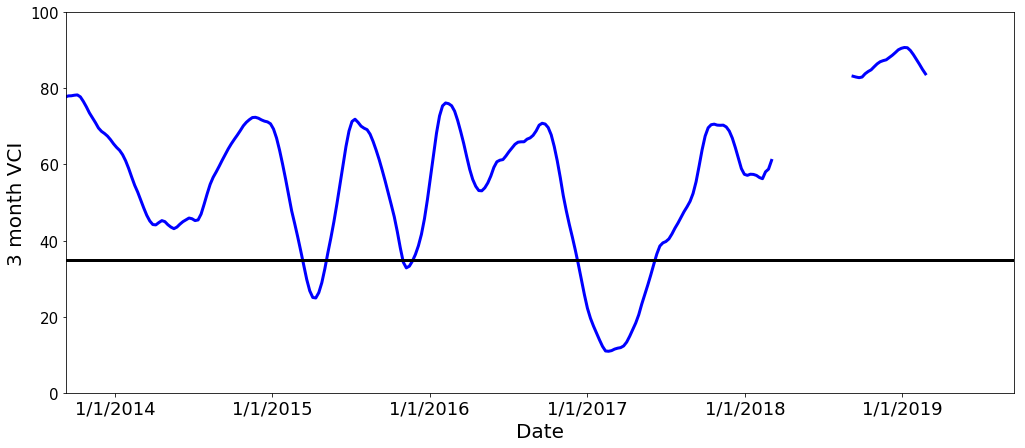

In [8]:
T,VCI1W,VCI3M = plot_func.load_MODIS(region)
plot_func.plot_vci_plain(T,VCI3M,'3 month VCI')                   

## The next box calibrates the error bar, this is only needed if large amounts of new data is added or when the data is not calibrated, we recommand using this box once every half year

In [9]:
## the calibration box, this runs the forecast in hindsight to compare with the True values
e_bar = plot_func.calibrate_weekly(T,VCI3M,nf,num)        

Would you like to save the calibration (yes or no):  yes


Saving calibration......


In [10]:
## Traiing the GP to make a forecast for the next 8 weeks
steps = 250
use = (np.isfinite(VCI3M)) 
mean, Xtest_use = plot_func.run_GP_MODIS(T[use],VCI3M[use],steps)

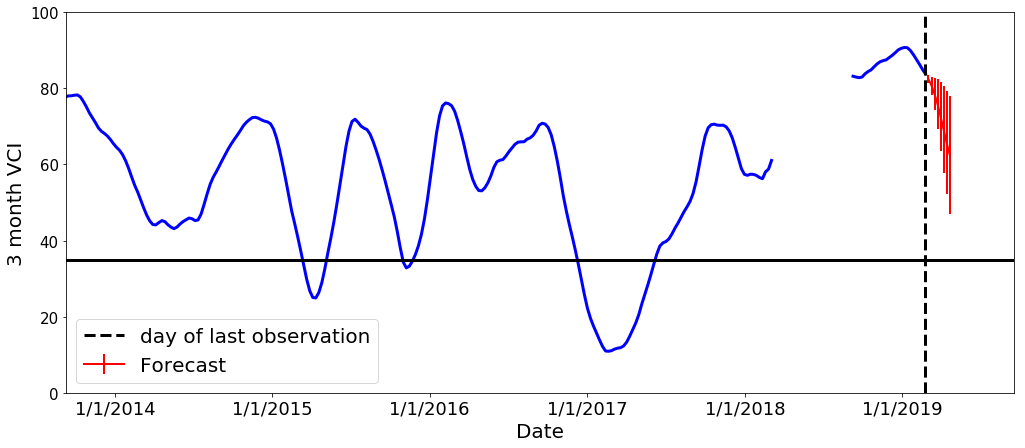

week(s) =  1 ,   VCI3M =  82 ,   region = Elgeyo_Marakwet_Z24
week(s) =  2 ,   VCI3M =  81 ,   region = Elgeyo_Marakwet_Z24
week(s) =  3 ,   VCI3M =  79 ,   region = Elgeyo_Marakwet_Z24
week(s) =  4 ,   VCI3M =  76 ,   region = Elgeyo_Marakwet_Z24
week(s) =  5 ,   VCI3M =  73 ,   region = Elgeyo_Marakwet_Z24
week(s) =  6 ,   VCI3M =  69 ,   region = Elgeyo_Marakwet_Z24
week(s) =  7 ,   VCI3M =  66 ,   region = Elgeyo_Marakwet_Z24
week(s) =  8 ,   VCI3M =  63 ,   region = Elgeyo_Marakwet_Z24
Trend next month:DOWN


In [11]:
## show the forecast
plot_func.plot_vci_m(T,VCI3M,'3 month VCI',Xtest_use,mean,e_bar,region)                   

# Using NDMA monthly VCI

In [12]:
nf = 'av_errorbar_MODIS_VCI_BOKU_23reg.npy'
Y,M,V,region, e_bar, num = plot_func.load_BOKU(nf) # the year, month and VCI3M

Choose 0 for:  BARINGO
Choose 1 for:  EMBU
Choose 2 for:  Garissa
Choose 3 for:  Isiolo
Choose 4 for:  KILIFI
Choose 5 for:  KWALE
Choose 6 for:  Kajiado
Choose 7 for:  Kitui
Choose 8 for:  LAIKIPIA
Choose 9 for:  LAMU
Choose 10 for:  Makueni
Choose 11 for:  Mandera
Choose 12 for:  Marsabit
Choose 13 for:  Meru
Choose 14 for:  NAROK
Choose 15 for:  NYERI
Choose 16 for:  Samburu
Choose 17 for:  TURKANA
Choose 18 for:  TaitaTaveta
Choose 19 for:  TanaRiver
Choose 20 for:  Tharaka-Nithi
Choose 21 for:  WEST POKOT
Choose 22 for:  Wajir


Please select a region:  17


You have choosen: TURKANA

 The uncertainty is not calibrated, please use the calibration box


## The plot of the VCI3M time series since 2014


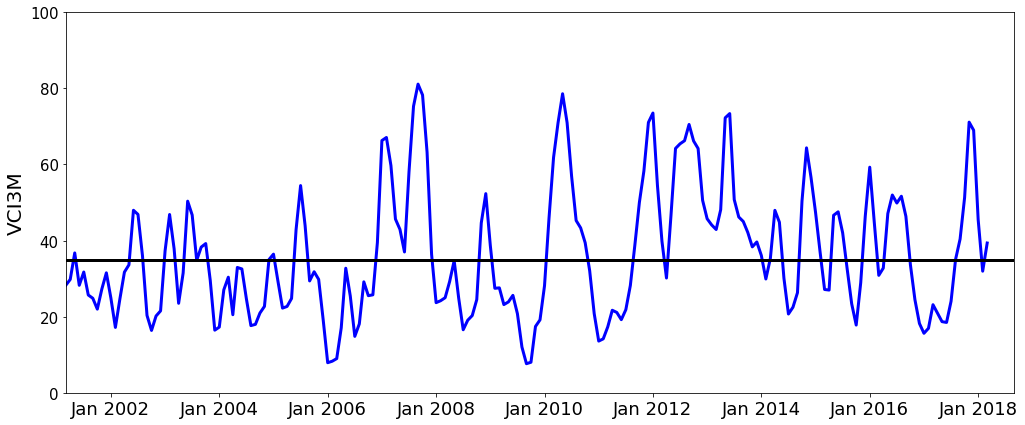

In [13]:
plot_func.plot_M(Y,M,V)

## The next box calibrates the error bar, this is only needed if large amounts of new data is added or when the data is not calibrated, we recommand using this box once every half year

In [14]:
## the calibration box, this runs the forecast in hindsight to compare with the True values
e_bar = plot_func.calibrate_monthly(Y,V,nf,num)        

Would you like to save the calibration (yes or no):  yes


Saving calibration......


In [15]:
## Traiing the GP to make a forecast for the next 3 months
steps = 250
mean, X_val = plot_func.run_GP_MODIS_M(np.arange(np.size(Y)),V,steps)

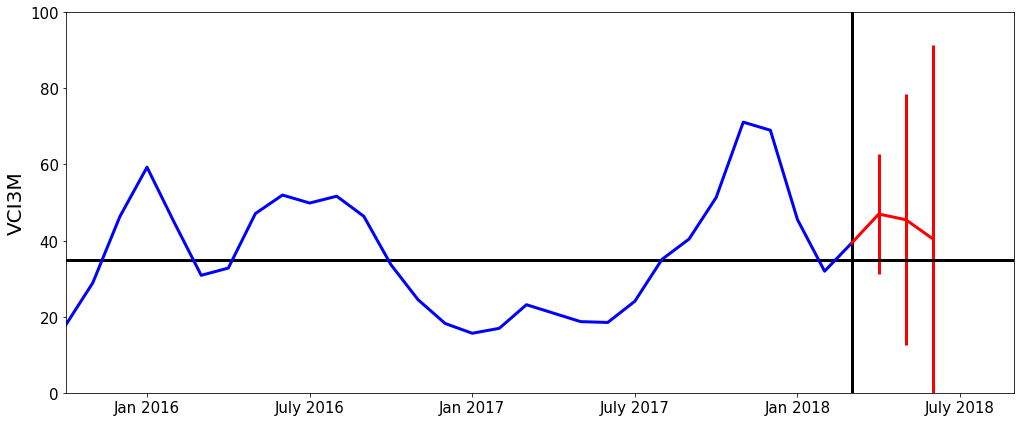

VCI3M =  47  for Month: 4  Year: 2018 region: TURKANA
Trend:UP


In [16]:
## show the forecast
plot_func.plot_fc(mean, X_val, V, M , Y, region,e_bar)